# Gold Coast wave manitoring 

+ [Gold Coast wave monitoring](https://www.qld.gov.au/environment/coasts-waterways/beach/monitoring/waves-sites/gold-coast)

Bottom right hand of the page you will see a `Download data` button, which provides 



+ WHTH sea_surface_wave_significant_height - Significant height of waves on the water body - m                                                                                                             ,
+ WMXH sea_surface_wave_maximum_height - Maximum height of waves on the water body - m                                                                                                             ,
+ WPMH sea_surface_wave_mean_period - Seconds - s 

In [1]:
%matplotlib inline
from pylab import *
import netCDF4
import datetime as dt
import numpy as np
import pandas as pd
import matplotlib.dates as mdates

from pylab import rcParams
import warnings
warnings.filterwarnings('ignore')

In [2]:
data_df = pd.read_csv("../pracenv/dataset/Waverider_buoys_Observations-GoldCoast.csv")

dates = pd.to_datetime(data_df['TIME'], format = '%Y-%m-%dT%H:%M:%SZ')

In [3]:
data_df['WHTH']

0      1.9
1      1.8
2      1.8
3      1.7
4      1.7
      ... 
175    1.0
176    1.1
177    1.0
178    1.1
179    1.1
Name: WHTH, Length: 180, dtype: float64

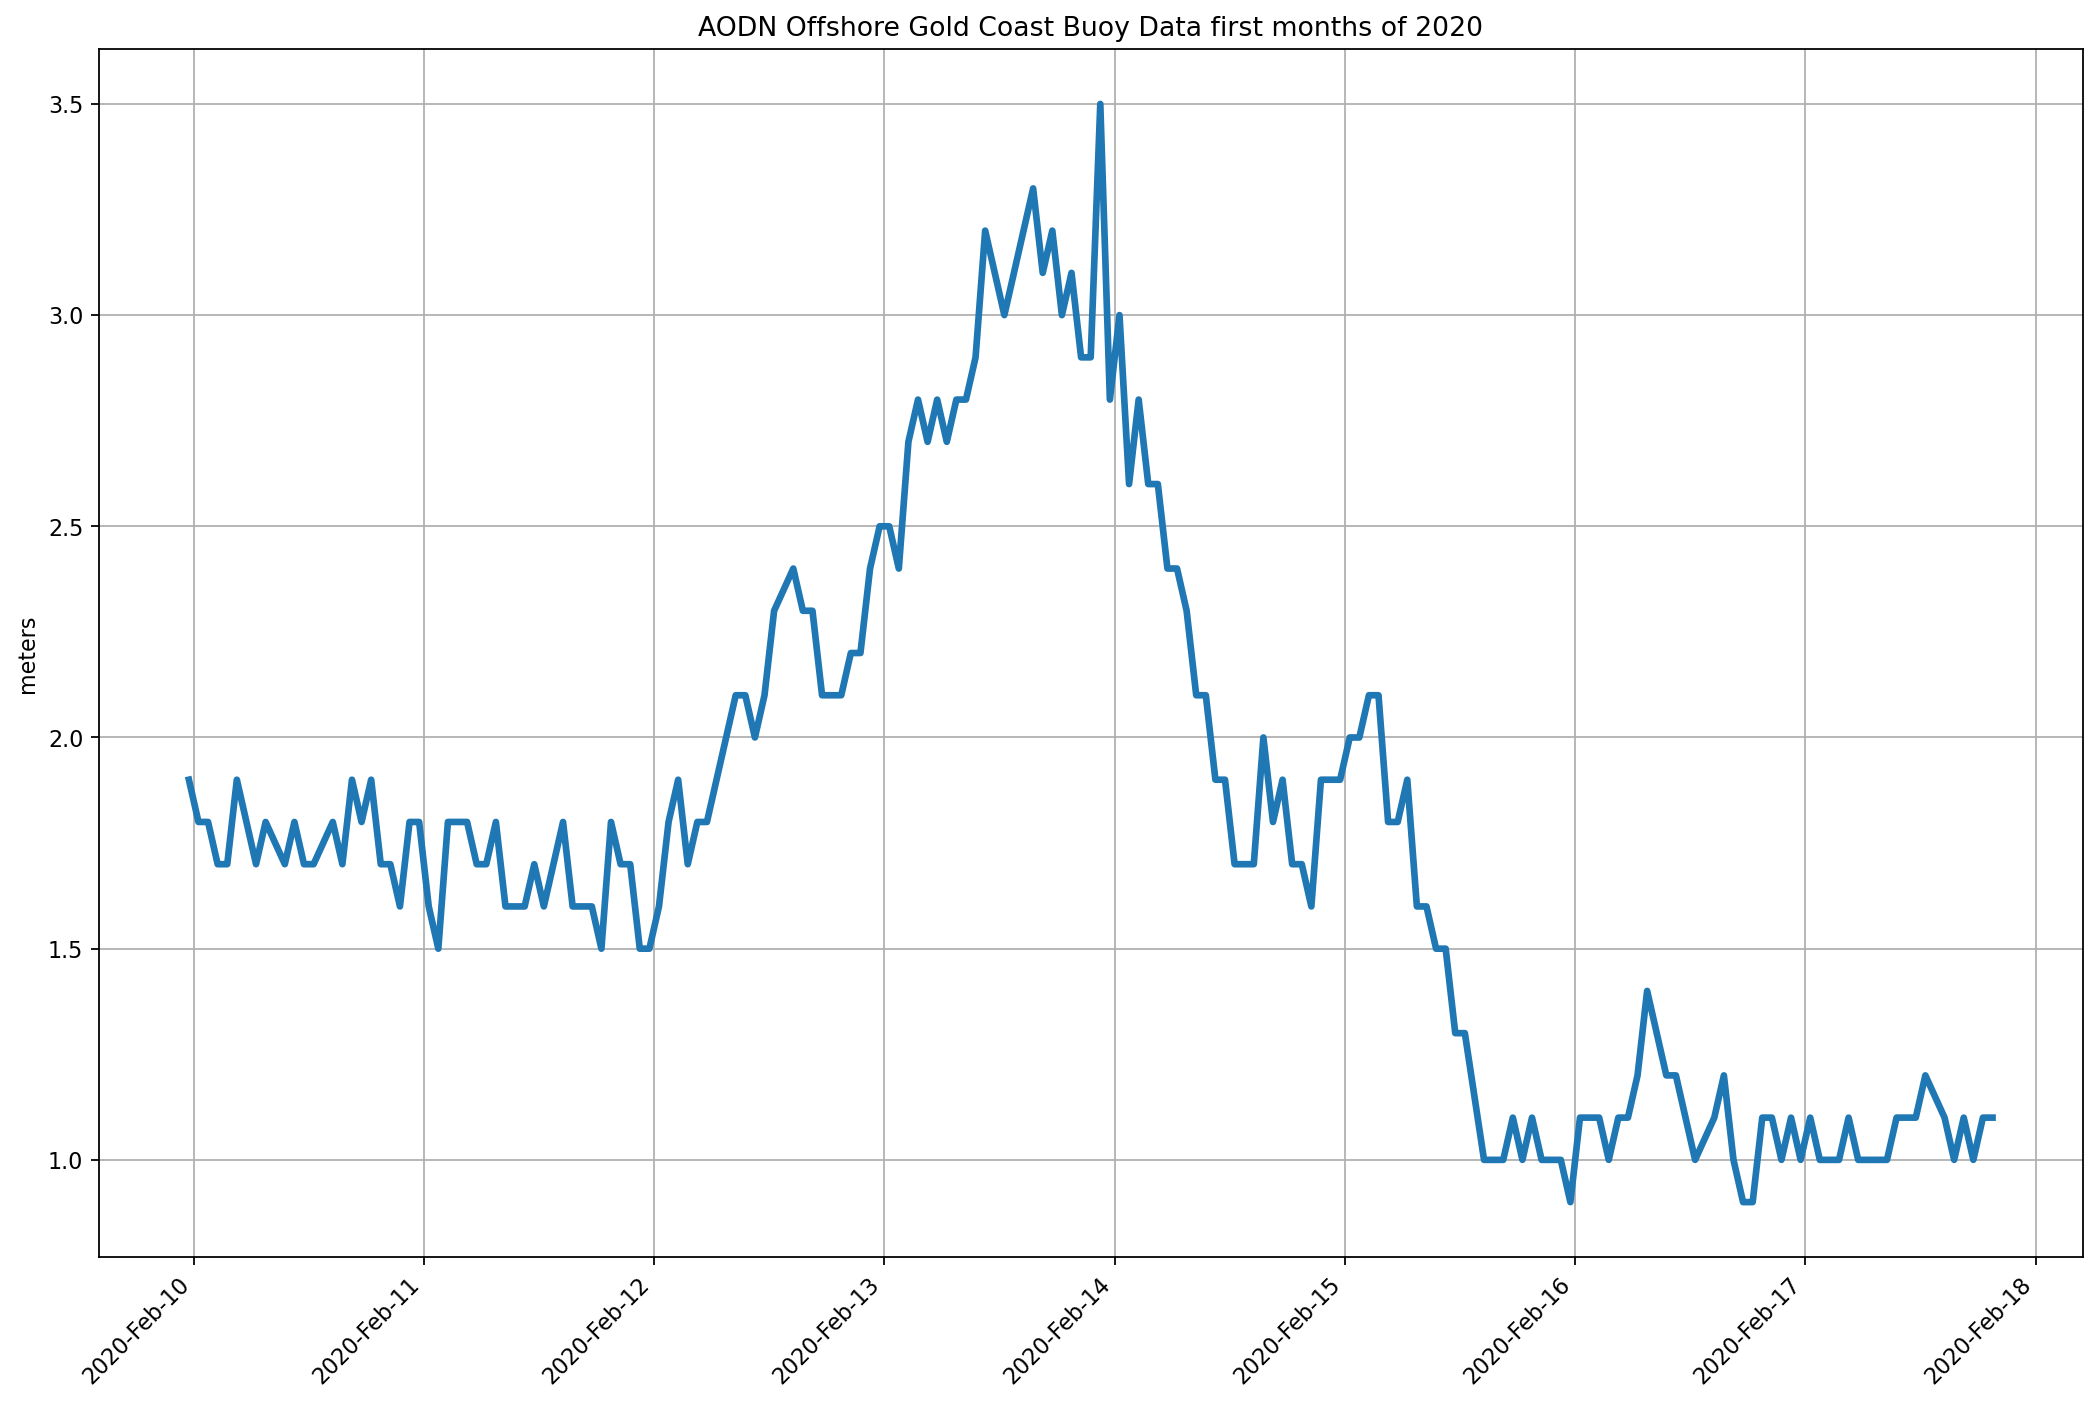

In [4]:
MyDateFormatter = DateFormatter('%Y-%b-%d')
fig = plt.figure(figsize=(16,10), dpi=160) 
ax1 = fig.add_subplot(111)
ax1.plot(dates,data_df['WHTH'],linewidth=3) 
locator = mdates.AutoDateLocator()
ax1.xaxis.set_major_locator(locator)
ax1.xaxis.set_major_formatter(MyDateFormatter)
ax1.grid(True)
setp(gca().get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('AODN Offshore Gold Coast Buoy Data first months of 2020')
ax1.set_ylabel('meters')

fig.show()